In [20]:
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings('ignore')

# libraries used for graph and visulization
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns

# libraries used for missing value 
import missingno as msno   #need to install

#libraries used for preprocessing and modeling
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score

from sklearn.ensemble import RandomForestClassifier, VotingClassifier, GradientBoostingClassifier
from sklearn.svm import SVC


from sklearn.metrics import accuracy_score, precision_score, roc_curve, f1_score, recall_score, confusion_matrix, classification_report,  plot_confusion_matrix
from sklearn.model_selection import GridSearchCV





In [2]:
pip install missingno

Note: you may need to restart the kernel to use updated packages.


In [23]:
df = pd.read_csv('Lending_Club_Data.csv')

In [4]:
df.describe()

,Id,is_bad,annual_inc,debt_to_income,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,collections_12_mths_ex_med,mths_since_last_major_derog
count,10000.00000,10000.000000,9999.000000,10000.000000,9995.000000,9995.000000,3684.000000,840.000000,9995.000000,9995.000000,1.000000e+04,9974.000000,9995.000000,9968.0,10000.000000
mean,5000.50000,0.129500,68203.011539,13.338704,0.148174,1.066933,35.890337,61.652381,9.334567,0.060130,1.427101e+04,48.450771,22.011306,0.0,2.002200
std,2886.89568,0.335769,48590.252757,6.754212,0.506270,1.476052,22.361443,46.189619,4.526590,0.251245,2.543791e+04,28.220557,11.709400,0.0,0.810963
min,1.00000,0.000000,2000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000e+00,0.000000,1.000000,0.0,1.000000
25%,2500.75000,0.000000,40000.000000,8.160000,0.000000,0.000000,18.000000,0.000000,6.000000,0.000000,3.524500e+03,25.000000,13.000000,0.0,1.000000
50%,5000.50000,0.000000,58000.000000,13.410000,0.000000,1.000000,34.000000,86.000000,9.000000,0.000000,8.645500e+03,48.700000,20.000000,0.0,2.000000
75%,7500.25000,0.000000,82000.000000,18.692500,0.000000,2.000000,53.000000,101.000000,12.000000,0.000000,1.695225e+04,71.800000,29.000000,0.0,3.000000
max,10000.00000,1.000000,900000.000000,29.990000,11.000000,25.000000,120.000000,119.000000,39.000000,3.000000,1.207359e+06,100.600000,90.000000,0.0,3.000000


In [25]:
loan_df =df.copy()

In [6]:
loan_df.isna().sum()

Id                                0
is_bad                            0
emp_title                       592
emp_length                        0
home_ownership                    0
annual_inc                        1
verification_status               0
pymnt_plan                        0
Notes                          3230
purpose_cat                       0
purpose                           4
zip_code                          0
addr_state                        0
debt_to_income                    0
delinq_2yrs                       5
earliest_cr_line                  5
inq_last_6mths                    5
mths_since_last_delinq         6316
mths_since_last_record         9160
open_acc                          5
pub_rec                           5
revol_bal                         0
revol_util                       26
total_acc                         5
initial_list_status               0
collections_12_mths_ex_med       32
mths_since_last_major_derog       0
policy_code                 

<AxesSubplot:>

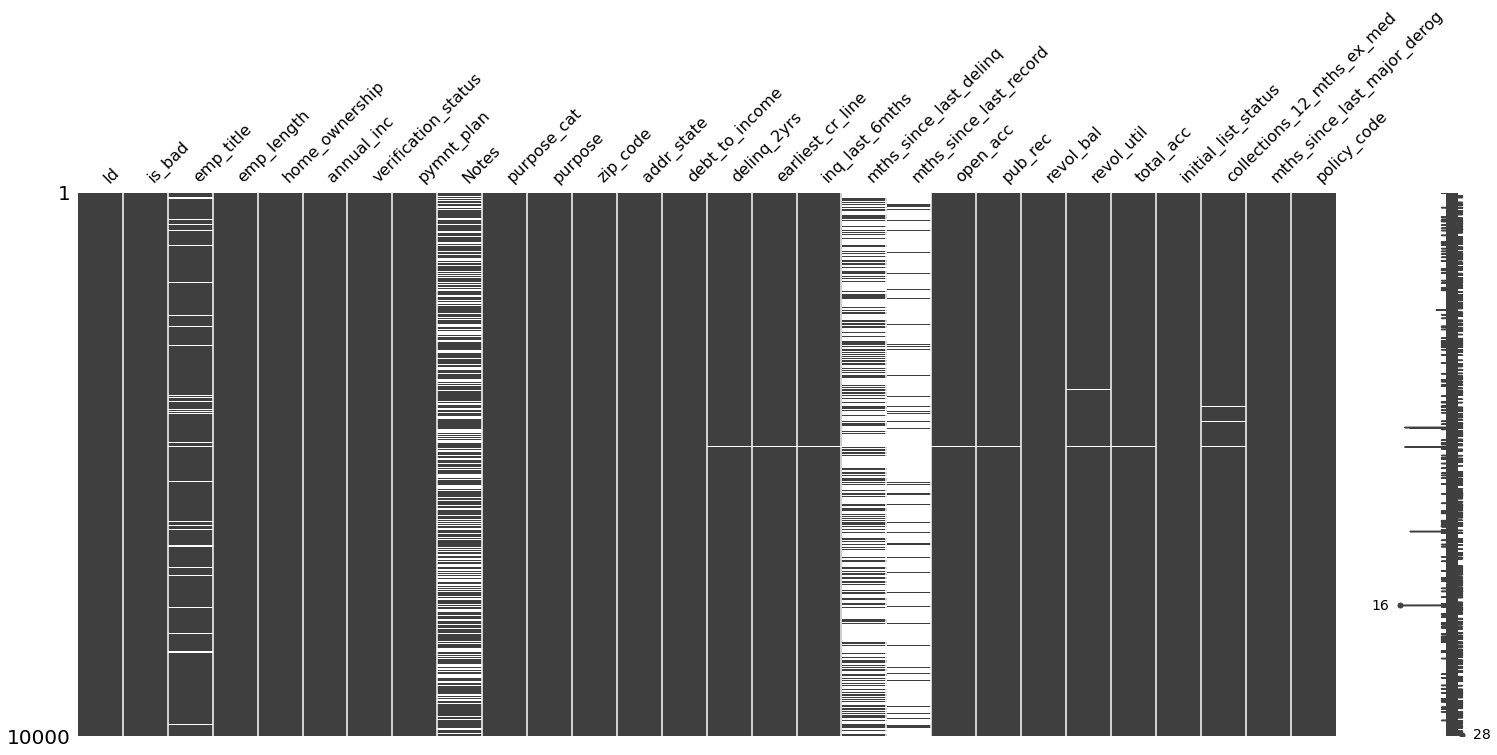

In [347]:
msno.matrix(loan_df)

<AxesSubplot:>

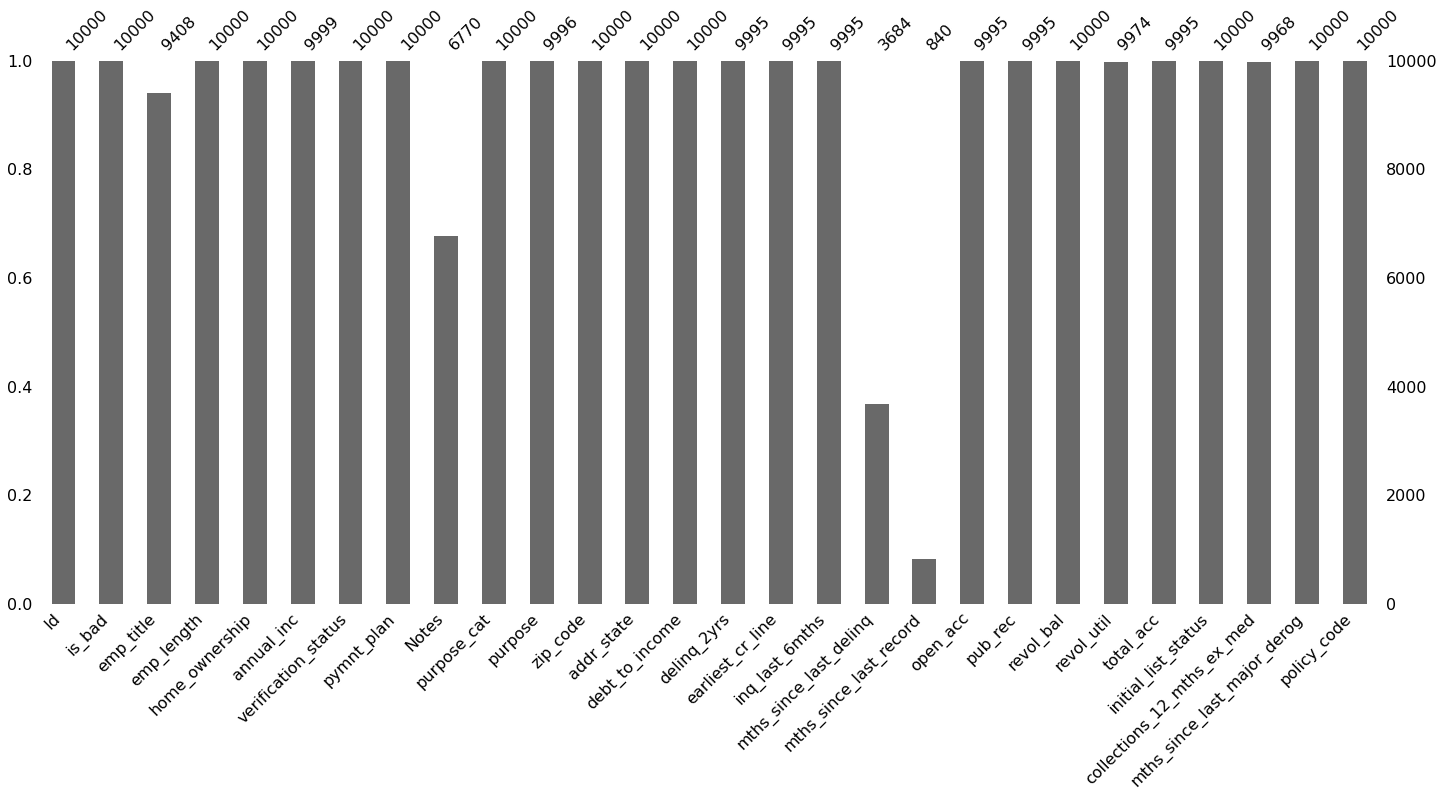

In [348]:
msno.bar(loan_df)

In [7]:
loan_df.head()

,Id,is_bad,emp_title,emp_length,home_ownership,annual_inc,verification_status,pymnt_plan,Notes,purpose_cat,...,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code
0,1,0,Time Warner Cable,10,MORTGAGE,50000.0,not verified,n,NaN,medical,...,NaN,15.0,0.0,12087,12.1,44.0,f,0.0,1,PC4
1,2,0,Ottawa University,1,RENT,39216.0,not verified,n,Borrower added on 04/14/11 > I will be using...,debt consolidation,...,NaN,4.0,0.0,10114,64.0,5.0,f,0.0,2,PC1
2,3,0,Kennedy Wilson,4,RENT,65000.0,not verified,n,NaN,credit card,...,NaN,4.0,0.0,81,0.6,8.0,f,0.0,3,PC4
3,4,0,TOWN OF PLATTEKILL,10,MORTGAGE,57500.0,not verified,n,NaN,debt consolidation,...,NaN,6.0,0.0,10030,37.1,23.0,f,0.0,2,PC2
4,5,0,Belmont Correctional,10,MORTGAGE,50004.0,VERIFIED - income,n,"I want to consolidate my debt, pay for a vacat...",debt consolidation,...,NaN,8.0,0.0,10740,40.4,21.0,f,0.0,3,PC3


In [26]:
loan_df.emp_title.value_counts()

US Army                37
Bank of America        23
IBM                    22
USAF                   17
US Navy                17
                       ..
Messier Bugatti USA     1
US Customs              1
City of Riverside       1
Amedisys                1
Rehab Alliance          1
Name: emp_title, Length: 8183, dtype: int64

In [350]:
loan_df.emp_title.value_counts().tail()

Bebe stores inc                       1
Gilman City R-IV School District      1
Cajon Valley Union School District    1
Echelon                               1
Zone Striping                         1
Name: emp_title, dtype: int64

In [13]:
loan_df.emp_title.unique().shape

(8184,)

In [2]:
import pandas as pd

# Create a DataFrame
data = {'A': [1, 2, 3], 'B': [4, 5, 6]}
df = pd.DataFrame(data)

# Drop column 'B'
df.drop(columns=['B'], inplace=True)
df


,A
0,1
1,2
2,3


In [3]:
# Create a DataFrame with missing values
data = {'A': [1, 2, None], 'B': [4, None, 6]}
df = pd.DataFrame(data)

# Drop rows with any NaN values
df.dropna(inplace=True)
df

,A,B
0,1.0,4.0


In [4]:
import pandas as pd
import numpy as np

# Create a DataFrame with missing values
data = {'A': [1, 2, None], 'B': [4, None, 6], 'C': [None, 8, 9]}
df = pd.DataFrame(data)

# Display the original DataFrame
print("Original DataFrame:")
print(df)

# Drop columns with any NaN values
df.dropna(axis=1, inplace=True)

# Display the modified DataFrame
print("\nDataFrame after dropping columns with NaN values:")
print(df)


Original DataFrame:
     A    B    C
0  1.0  4.0  NaN
1  2.0  NaN  8.0
2  NaN  6.0  9.0

DataFrame after dropping columns with NaN values:
Empty DataFrame
Columns: []
Index: [0, 1, 2]


In [10]:
import numpy as np
df = pd.DataFrame(np.arange(25).reshape(5, 5),  
                      index=list('abcde'), 
                      columns=['x','y','z', 'a', 'b'])
df

,x,y,z,a,b
a,0,1,2,3,4
b,5,6,7,8,9
c,10,11,12,13,14
d,15,16,17,18,19
e,20,21,22,23,24


In [14]:
df.loc['c': 'd' , :'z']

,x,y,z
c,10,11,12
d,15,16,17


In [13]:
df.iloc[:, 3] 

a     3
b     8
c    13
d    18
e    23
Name: a, dtype: int32

In [27]:
#data won’t be meaningful and any relationship we might observe might be due to confounding relationships
#A more advanced implementation might look to group all these job descriptions into categories and/or examine
#if Lending Club’s model looks at (annual_inc + emp_title) versus just annual_inc
loan_df.drop(['emp_title'],1, inplace=True)

In [28]:
# droping columns having misleading values, missing values > 50%, indentity values, encrypted values
loan_df.drop(['mths_since_last_delinq','mths_since_last_record','collections_12_mths_ex_med','Notes','purpose','earliest_cr_line','Id','collections_12_mths_ex_med','initial_list_status','zip_code'], axis=1,inplace=True)

In [29]:
loan_df.emp_length.value_counts()

10    2160
1     2083
2     1183
3     1010
4      889
5      779
6      535
7      421
8      351
9      331
na     250
22       5
11       2
33       1
Name: emp_length, dtype: int64

In [35]:
#filling na values with avreage values
loan_df['emp_length'] = pd.to_numeric(loan_df['emp_length'], errors='coerce')
avg_value=loan_df['emp_length'].median()
loan_df['emp_length'] =loan_df['emp_length'].fillna(avg_value)
loan_df

,is_bad,emp_length,home_ownership,annual_inc,verification_status,pymnt_plan,purpose_cat,addr_state,debt_to_income,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,mths_since_last_major_derog,policy_code
0,0,10.0,MORTGAGE,50000.0,not verified,n,medical,TX,10.87,0.0,0.0,15.0,0.0,12087,12.1,44.0,1,PC4
1,0,1.0,RENT,39216.0,not verified,n,debt consolidation,KS,9.15,0.0,2.0,4.0,0.0,10114,64.0,5.0,2,PC1
2,0,4.0,RENT,65000.0,not verified,n,credit card,CA,11.24,0.0,0.0,4.0,0.0,81,0.6,8.0,3,PC4
3,0,10.0,MORTGAGE,57500.0,not verified,n,debt consolidation,NY,6.18,1.0,0.0,6.0,0.0,10030,37.1,23.0,2,PC2
4,0,10.0,MORTGAGE,50004.0,VERIFIED - income,n,debt consolidation,OH,19.03,0.0,4.0,8.0,0.0,10740,40.4,21.0,3,PC3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0,5.0,MORTGAGE,66250.0,VERIFIED - income,n,wedding,MA,9.40,0.0,1.0,8.0,0.0,3656,24.1,10.0,2,PC3
9996,0,1.0,RENT,26000.0,VERIFIED - income source,n,debt consolidation,NY,20.49,0.0,1.0,8.0,0.0,6709,58.9,12.0,2,PC3
9997,0,8.0,RENT,47831.0,not verified,n,debt consolidation,NJ,24.13,0.0,0.0,9.0,1.0,11346,60.7,17.0,3,PC3
9998,0,6.0,MORTGAGE,70000.0,not verified,n,major purchase,VA,16.18,2.0,2.0,9.0,0.0,17157,50.9,27.0,2,PC3


In [356]:
loan_df.isnull().sum()

is_bad                          0
emp_length                      0
home_ownership                  0
annual_inc                      1
verification_status             0
pymnt_plan                      0
purpose_cat                     0
addr_state                      0
debt_to_income                  0
delinq_2yrs                     5
inq_last_6mths                  5
open_acc                        5
pub_rec                         5
revol_bal                       0
revol_util                     26
total_acc                       5
mths_since_last_major_derog     0
policy_code                     0
dtype: int64

In [357]:
#VERIFIED - income and VERIFIED - income source could potentially be the same criteria
loan_df.verification_status.value_counts()

not verified                4367
VERIFIED - income           3214
VERIFIED - income source    2419
Name: verification_status, dtype: int64

In [358]:
for i in loan_df._get_numeric_data().columns:
    loan_df[i] = loan_df[i].fillna(loan_df[i].median())

In [41]:
a = np.array([[1,2,3],[4,5,6],[7,8,9]])

In [43]:
tri_upper_diag = np.triu(a, k=0)
tri_upper_diag

array([[1, 2, 3],
       [0, 5, 6],
       [0, 0, 9]])

In [44]:
tri_lower_diag = np.tril(a, k=0)
tri_lower_diag

array([[1, 0, 0],
       [4, 5, 0],
       [7, 8, 9]])

# EDA - on Leanding club data


In [38]:
cor = loan_df.corr()
cor

,is_bad,emp_length,annual_inc,debt_to_income,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,mths_since_last_major_derog
is_bad,1.000000,-0.024146,-0.050975,0.029873,0.021842,-0.001146,-0.020356,0.032174,-0.016202,0.087876,-0.055307,0.015481
emp_length,-0.024146,1.000000,0.148533,0.058816,0.024565,-0.017201,0.100505,0.054567,0.111099,0.021091,0.209183,0.002707
annual_inc,-0.050975,0.148533,1.000000,-0.130184,0.038670,0.056718,0.233821,-0.010398,0.359817,0.030792,0.329146,-0.002476
debt_to_income,0.029873,0.058816,-0.130184,1.000000,-0.034393,0.012819,0.301003,-0.005351,0.163794,0.271439,0.233594,-0.007031
delinq_2yrs,0.021842,0.024565,0.038670,-0.034393,1.000000,0.039215,0.027398,0.020411,-0.030090,-0.051301,0.081918,-0.002744
inq_last_6mths,-0.001146,-0.017201,0.056718,0.012819,0.039215,1.000000,0.088105,0.054711,0.043130,-0.037232,0.084671,0.008570
open_acc,-0.020356,0.100505,0.233821,0.301003,0.027398,0.088105,1.000000,0.006680,0.233842,-0.074018,0.695387,-0.006169
pub_rec,0.032174,0.054567,-0.010398,-0.005351,0.020411,0.054711,0.006680,1.000000,-0.038547,0.051016,-0.013598,-0.002614
revol_bal,-0.016202,0.111099,0.359817,0.163794,-0.030090,0.043130,0.233842,-0.038547,1.000000,0.201962,0.257274,-0.007541
revol_util,0.087876,0.021091,0.030792,0.271439,-0.051301,-0.037232,-0.074018,0.051016,0.201962,1.000000,-0.051072,-0.002756


In [36]:
#highly corelated attributes
cor = loan_df.corr()
#cor.loc[:,:] = np.tril(cor, k=-1) 
cor = cor.stack()
cor[(cor > 0.55) | (cor < -0.55)]

is_bad                       is_bad                         1.000000
emp_length                   emp_length                     1.000000
annual_inc                   annual_inc                     1.000000
debt_to_income               debt_to_income                 1.000000
delinq_2yrs                  delinq_2yrs                    1.000000
inq_last_6mths               inq_last_6mths                 1.000000
open_acc                     open_acc                       1.000000
                             total_acc                      0.695387
pub_rec                      pub_rec                        1.000000
revol_bal                    revol_bal                      1.000000
revol_util                   revol_util                     1.000000
total_acc                    open_acc                       0.695387
                             total_acc                      1.000000
mths_since_last_major_derog  mths_since_last_major_derog    1.000000
dtype: float64

In [360]:
loan_df.drop(['total_acc'], axis=1, inplace=True)

In [361]:
loan_df.pymnt_plan.unique().shape

(2,)

In [362]:
loan_df.pymnt_plan.value_counts()

n    9998
y       2
Name: pymnt_plan, dtype: int64

In [363]:
# droping pymnt_plan, it is identity attribute
loan_df.drop(['pymnt_plan'],1, inplace=True)

In [364]:
loan_df.describe(include=['object'])

,home_ownership,verification_status,purpose_cat,addr_state,policy_code
count,10000,10000,10000,10000,10000
unique,5,3,27,50,5
top,RENT,not verified,debt consolidation,CA,PC3
freq,4745,4367,4454,1748,2098


In [365]:
len(loan_df.columns)

16

In [366]:
#correlation Matrix
loan_cor = loan_df.corr()

<AxesSubplot:>

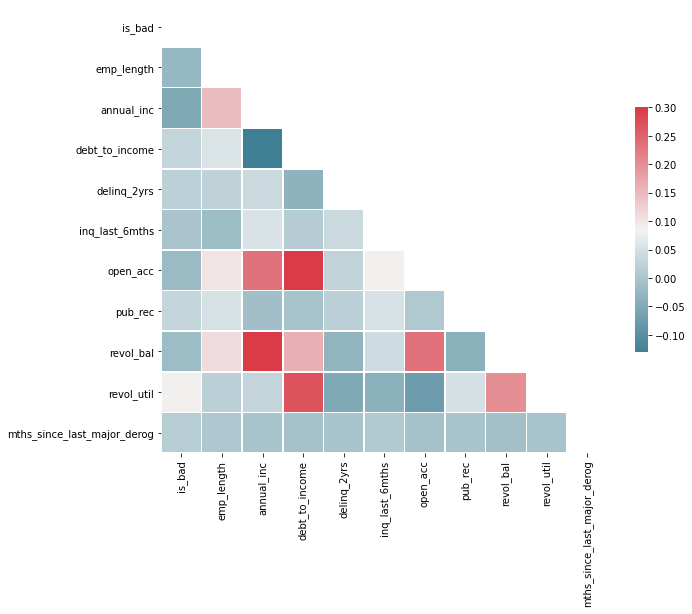

In [367]:
#heat map for correlation
mask = np.zeros_like(loan_cor, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

f, ax = plt.subplots(figsize=(10, 9))

cmap = sns.diverging_palette(220, 10, as_cmap=True)

sns.heatmap(loan_cor, mask=mask,
            vmax=.3,
            cmap=cmap,
            square=True,
            linewidths=.5,
            cbar_kws={"shrink": .5})

<AxesSubplot:>

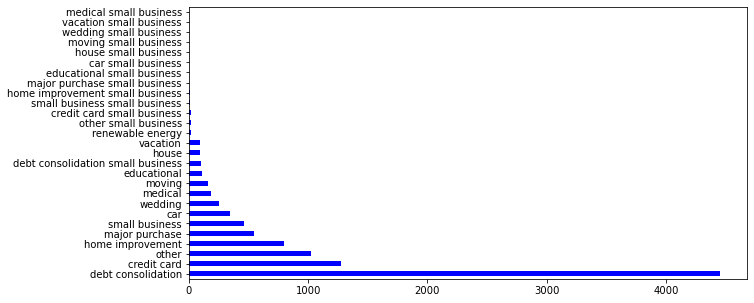

In [368]:
#analysing loan purpose
purpose = loan_df.purpose_cat.value_counts()
purpose.plot.barh(figsize =(10,5),color ="blue")

Text(0, 0.5, 'status')

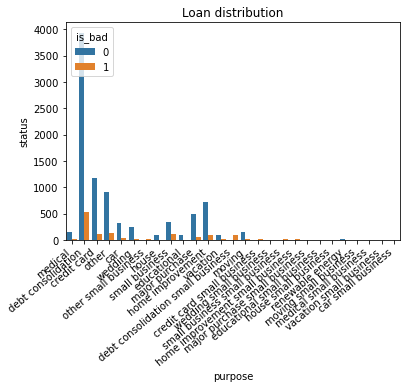

In [369]:
dist =sns.countplot(data=loan_df,hue='is_bad',x='purpose_cat')
dist.set_xticklabels(dist.get_xticklabels(), rotation=40, ha="right")
plt.title('Loan distribution')
plt.xlabel('purpose',)
plt.ylabel('status')

Text(0, 0.5, 'status')

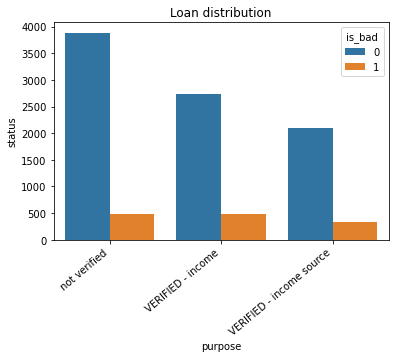

In [370]:
dist =sns.countplot(data=loan_df,hue='is_bad',x='verification_status')
dist.set_xticklabels(dist.get_xticklabels(), rotation=40, ha="right")
plt.title('Loan distribution')
plt.xlabel('purpose',)
plt.ylabel('status')

In [371]:
#analysing bad and not bad loan
is_bad_loan = loan_df[loan_df.is_bad == 1]
not_bad_loan = loan_df[loan_df.is_bad == 0]

In [408]:
print(not_bad_data.shape)
print(is_bad_data.shape)
print(loan_df['is_bad'].shape)

(8705, 17)
(1295, 17)
(10000,)


In [372]:
is_bad_loan.head()

,is_bad,emp_length,home_ownership,annual_inc,verification_status,purpose_cat,addr_state,debt_to_income,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,mths_since_last_major_derog,policy_code
16,1,10.0,OWN,22000.0,VERIFIED - income source,other small business,FL,14.95,0.0,0.0,4.0,0.0,8511,78.8,3,PC2
20,1,2.0,MORTGAGE,72000.0,not verified,small business,OK,17.48,0.0,6.0,13.0,0.0,1249,6.1,3,PC3
51,1,1.0,MORTGAGE,120000.0,VERIFIED - income source,other,MD,21.16,4.0,1.0,25.0,0.0,43109,72.3,3,PC5
54,1,1.0,RENT,23040.0,VERIFIED - income source,credit card,CA,12.66,0.0,0.0,6.0,0.0,8282,62.3,2,PC3
55,1,1.0,RENT,15000.0,VERIFIED - income,other,TX,18.08,0.0,0.0,2.0,0.0,9279,36.5,1,PC4


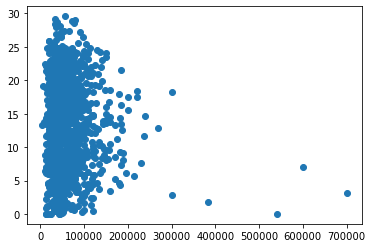

In [373]:
plt.scatter(x= is_bad_loan['annual_inc'], y= is_bad_data['debt_to_income'])

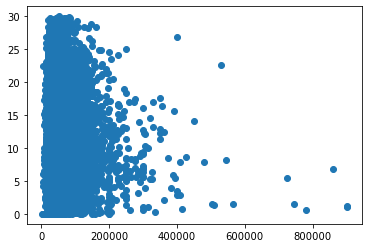

In [374]:
plt.scatter(x= not_bad_data['annual_inc'], y= not_bad_data['debt_to_income'])

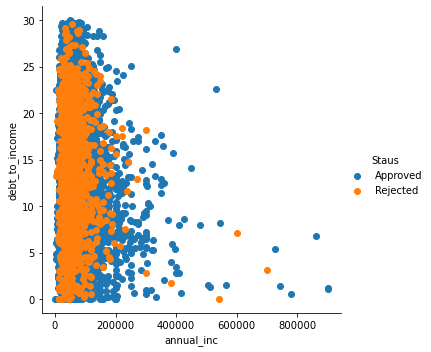

In [375]:
sns.FacetGrid(loan_df, hue="is_bad",size=5) \
   .map(plt.scatter, "annual_inc", "debt_to_income") \
   .add_legend(title = 'Staus', labels = ['Approved','Rejected'])

In [376]:
loan_df.head()

,is_bad,emp_length,home_ownership,annual_inc,verification_status,purpose_cat,addr_state,debt_to_income,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,mths_since_last_major_derog,policy_code
0,0,10.0,MORTGAGE,50000.0,not verified,medical,TX,10.87,0.0,0.0,15.0,0.0,12087,12.1,1,PC4
1,0,1.0,RENT,39216.0,not verified,debt consolidation,KS,9.15,0.0,2.0,4.0,0.0,10114,64.0,2,PC1
2,0,4.0,RENT,65000.0,not verified,credit card,CA,11.24,0.0,0.0,4.0,0.0,81,0.6,3,PC4
3,0,10.0,MORTGAGE,57500.0,not verified,debt consolidation,NY,6.18,1.0,0.0,6.0,0.0,10030,37.1,2,PC2
4,0,10.0,MORTGAGE,50004.0,VERIFIED - income,debt consolidation,OH,19.03,0.0,4.0,8.0,0.0,10740,40.4,3,PC3


In [377]:
loan_df.home_ownership.value_counts()

RENT        4745
MORTGAGE    4445
OWN          775
OTHER         34
NONE           1
Name: home_ownership, dtype: int64

In [378]:
loan_df.addr_state.value_counts()

CA    1748
NY     958
FL     714
TX     700
NJ     482
VA     392
IL     386
PA     378
GA     357
MA     331
OH     292
MD     282
WA     217
AZ     210
CT     195
NC     194
MI     176
CO     175
MO     167
MN     136
SC     126
WI     124
AL     119
NV     114
OR     109
KY     103
OK      98
LA      97
UT      68
KS      57
DC      54
RI      53
NH      50
AR      48
WV      45
NM      43
DE      35
HI      32
AK      26
MT      25
WY      23
SD      19
VT      18
MS       9
TN       5
IN       3
NE       3
IA       2
ID       1
ME       1
Name: addr_state, dtype: int64

In [379]:
loan_df.policy_code.value_counts()

PC3    2098
PC5    2025
PC1    1978
PC2    1962
PC4    1937
Name: policy_code, dtype: int64

In [380]:
# Droping policy_code, not relevent for investigation
loan_df.drop(['policy_code'],1, inplace=True)

In [381]:
# Droping addr_state, not relevent for investigation
loan_df.drop(['addr_state'],1, inplace=True)

In [382]:
#dealing with categorical attributes

# Create dummy variables from the feature purpose_cat
loan_df = pd.get_dummies(loan_df, columns=["purpose_cat"], drop_first=True)

# Create dummy variables from the feature home_ownership 
loan_df = pd.get_dummies(loan_df, columns=["home_ownership"], drop_first=True)

# Create dummy variables from the feature verification_status
loan_df = pd.get_dummies(loan_df, columns=["verification_status"], drop_first=True)

In [383]:
loan_df.head()

,is_bad,emp_length,annual_inc,debt_to_income,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,...,purpose_cat_vacation,purpose_cat_vacation small business,purpose_cat_wedding,purpose_cat_wedding small business,home_ownership_NONE,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT,verification_status_VERIFIED - income source,verification_status_not verified
0,0,10.0,50000.0,10.87,0.0,0.0,15.0,0.0,12087,12.1,...,0,0,0,0,0,0,0,0,0,1
1,0,1.0,39216.0,9.15,0.0,2.0,4.0,0.0,10114,64.0,...,0,0,0,0,0,0,0,1,0,1
2,0,4.0,65000.0,11.24,0.0,0.0,4.0,0.0,81,0.6,...,0,0,0,0,0,0,0,1,0,1
3,0,10.0,57500.0,6.18,1.0,0.0,6.0,0.0,10030,37.1,...,0,0,0,0,0,0,0,0,0,1
4,0,10.0,50004.0,19.03,0.0,4.0,8.0,0.0,10740,40.4,...,0,0,0,0,0,0,0,0,0,0


In [436]:
my_list = list(loan_df)
Independent = my_list[1:]

In [444]:
X = loan_df[Independent]

In [440]:
depended = ['is_bad']

In [441]:
Y = loan_df[depended]
Y.shape

(10000, 1)

In [446]:
X.shape

(10000, 42)

In [414]:
loan_df.head()

,is_bad,emp_length,annual_inc,debt_to_income,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,...,purpose_cat_vacation,purpose_cat_vacation small business,purpose_cat_wedding,purpose_cat_wedding small business,home_ownership_NONE,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT,verification_status_VERIFIED - income source,verification_status_not verified
0,0,10.0,50000.0,10.87,0.0,0.0,15.0,0.0,12087,12.1,...,0,0,0,0,0,0,0,0,0,1
1,0,1.0,39216.0,9.15,0.0,2.0,4.0,0.0,10114,64.0,...,0,0,0,0,0,0,0,1,0,1
2,0,4.0,65000.0,11.24,0.0,0.0,4.0,0.0,81,0.6,...,0,0,0,0,0,0,0,1,0,1
3,0,10.0,57500.0,6.18,1.0,0.0,6.0,0.0,10030,37.1,...,0,0,0,0,0,0,0,0,0,1
4,0,10.0,50004.0,19.03,0.0,4.0,8.0,0.0,10740,40.4,...,0,0,0,0,0,0,0,0,0,0


# Modeling and Feature Selection

## Randon Forest

In [447]:
# Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3, random_state = 0)

# Feature Scaling
sc = StandardScaler()

X_train[num]= sc.fit_transform(X_train[num])
X_test[num] = sc.transform(X_test[num])

In [448]:
X_train.shape

(7000, 42)

In [449]:
y_train.shape

(7000, 1)

In [453]:
rf_classifier = RandomForestClassifier(criterion = 'entropy',
                                                   max_depth= 4,
                                                   max_features ='log2',
                                                   n_estimators = 100,
                                                   min_samples_split = 6,
                                                   class_weight = {0: 1, 1: 5}
                                                  )

In [454]:
rf_classifier.fit(X_train, y_train)

RandomForestClassifier(class_weight={0: 1, 1: 5}, criterion='entropy',
                       max_depth=4, max_features='log2', min_samples_split=6)

In [480]:
y_pred_train_rf= rf_classifier.predict(X_train)

In [481]:
print('Precision', precision_score(y_train, y_pred_train_rf))
print('Accuracy', accuracy_score(y_train, y_pred_train_rf))
print('F1 Score', f1_score(y_train, y_pred_train_rf))
print('Recall', recall_score(y_train, y_pred_train_rf))

Precision 0.8484848484848485
Accuracy 0.885
F1 Score 0.2580645161290323
Recall 0.15217391304347827


In [482]:
y_pred_test_rf = rf_classifier.predict(X_test)

In [483]:
print('Precision', precision_score(y_test, y_pred_test_rf))
print('Accuracy', accuracy_score(y_test, y_pred_test_rf))
print('F1 Score', f1_score(y_test, y_pred_test_rf))
print('Recall', recall_score(y_test, y_pred_test_rf))

Precision 0.8135593220338984
Accuracy 0.8873333333333333
F1 Score 0.22119815668202766
Recall 0.128


In [490]:
cm_rf = confusion_matrix(y_test,y_pred_test)
print(cm_rf)

[[2614   11]
 [ 327   48]]


## SVM

In [478]:
svm_classifier = SVC(probability = True)
svm_classifier.fit(X_train,y_train)

SVC(probability=True)

In [479]:
y_pred_train_svm= svm_classifier.predict(X_train)

In [485]:
print('Precision', precision_score(y_train, y_pred_train_svm))
print('Accuracy', accuracy_score(y_train, y_pred_train_svm))
print('F1 Score', f1_score(y_train, y_pred_train_svm))
print('Recall', recall_score(y_train, y_pred_train_svm))

Precision 1.0
Accuracy 0.8878571428571429
F1 Score 0.2559241706161137
Recall 0.14673913043478262


In [486]:
y_pred_test_svm = svm_classifier.predict(X_test)

In [487]:
print('Precision', precision_score(y_test, y_pred_test_svm))
print('Accuracy', accuracy_score(y_test, y_pred_test_svm))
print('F1 Score', f1_score(y_test, y_pred_test_svm))
print('Recall', recall_score(y_test, y_pred_test_svm))

Precision 1.0
Accuracy 0.8926666666666667
F1 Score 0.2476635514018692
Recall 0.14133333333333334


In [491]:
cm_svm = confusion_matrix(y_test,y_pred_test_svm)
print(cm_svm)

[[2625    0]
 [ 322   53]]


In [493]:
import pandas as pd
feature_importances = pd.DataFrame(rf_classifier.feature_importances_,
                                   index = X_train.columns,
                                    columns=['importance']).sort_values('importance',     
                                                                        ascending=False)

<AxesSubplot:xlabel='importance'>

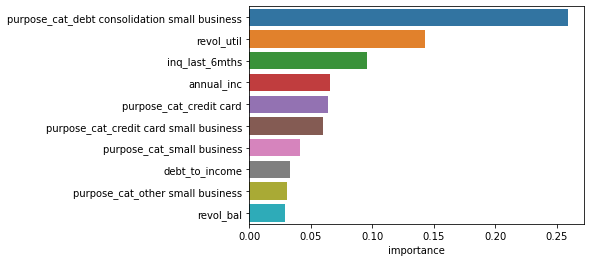

In [497]:
sns.barplot(x=feature_importances[:10].importance, y=feature_importances[:10].index)

In [499]:
y_scores_sm= svm_classifier.predict_proba(X_test.values)
y_scores_rf = rf_classifier.predict_proba(X_test.values)

In [502]:
fpr_rf, tpr_rf, thresholds_rf= roc_curve(y_test, y_scores_rf[:,1])
fpr_svm, tpr_svm, thresholds_svm= roc_curve(y_test, y_scores_sm[:,1])

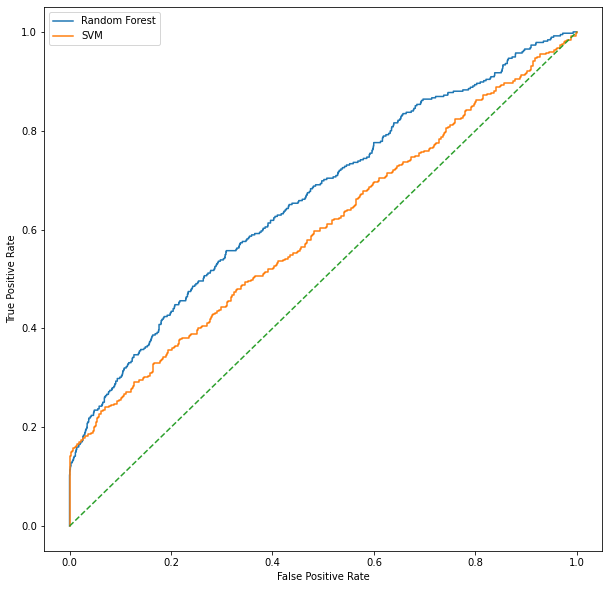

In [503]:
plt.figure(figsize=(10, 10))

plt.plot(fpr_rf, tpr_rf, label= 'Random Forest')
plt.plot(fpr_svm, tpr_svm, label= 'SVM')

plt.plot([0,1], [0,1], linestyle='--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()

In [505]:
y_scores_sm_train = svm_classifier.predict_proba(X_train.values)
y_scores_rf_train = rf_classifier.predict_proba(X_train.values)

In [507]:
fpr_rf_train, tpr_rf_train, thresholds_rf_train= roc_curve(y_train, y_scores_rf_train[:,1])
fpr_svm_train, tpr_svm_train, thresholds_svm_train= roc_curve(y_train, y_scores_sm_train[:,1])

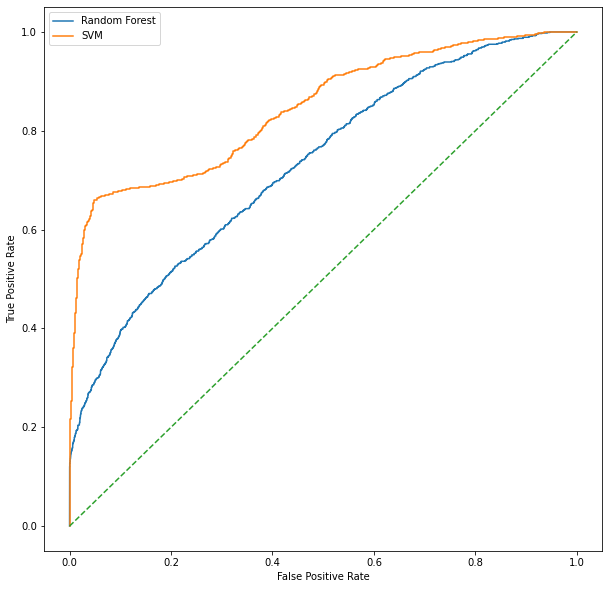

In [508]:
plt.figure(figsize=(10, 10))

plt.plot(fpr_rf_train, tpr_rf_train, label= 'Random Forest')
plt.plot(fpr_svm_train, tpr_svm_train, label= 'SVM')

plt.plot([0,1], [0,1], linestyle='--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()

# Saving a Model

In [519]:
import pickle
dict_objects = {'Standard Scaling':sc, 
                'Random Forest Classifier': rf_classifier,
                'SVM Classifier': svm_classifier
                }

In [520]:
filename = 'ModelPickles.pkl'
outfile = open(filename,'wb')

In [521]:
pickle.dump(dict_objects,outfile)
outfile.close()

In [ ]:
import googleapiclient.discovery

def predict_json(project, model, instances, version=None):
    """Send json data to a deployed model for prediction.
    Args:
        project (str): project where the AI Platform Prediction Model is deployed.
        model (str): model name.
        instances ([[float]]): List of input instances, where each input
           instance is a list of floats.
        version: str, version of the model to target.
    Returns:
        Mapping[str: any]: dictionary of prediction results defined by the
            model.
    """
    # Create the AI Platform Prediction service object.
    # To authenticate set the environment variable
    # GOOGLE_APPLICATION_CREDENTIALS=<path_to_service_account_file>
    service = googleapiclient.discovery.build('ml', 'v1')
    name = 'projects/{}/models/{}'.format(project, model)

    if version is not None:
        name += '/versions/{}'.format(version)

    response = service.projects().predict(
        name=name,
        body={'instances': instances}
    ).execute()
   
    if 'error' in response:
        raise RuntimeError(response['error'])

    return response['predictions']

In [ ]:
import json
os.environ['GOOGLE_APPLICATION_CREDENTIALS'] = 'xxxxxxxxxxxxx.json'

test = X_test.iloc[20:21].values
test.shape
test.reshape(1, -1)
instances = test.tolist()
predict_json('mwpmltr', 'lending_club_model', instances)